# Red Black Trees

**`Binary Search Trees`** have a problem. While it is true that on average *lookups, deletions and insertions* on BST are **`O(log(n)`**, that benefit can be broke quickly. 

If the sorted data is inserted into a binary tree, the tree will be much deeper than it is wide, which would bring the Big O complexity closer to **`O(n)`** since it would be a linked list

**Unbalanced tree**
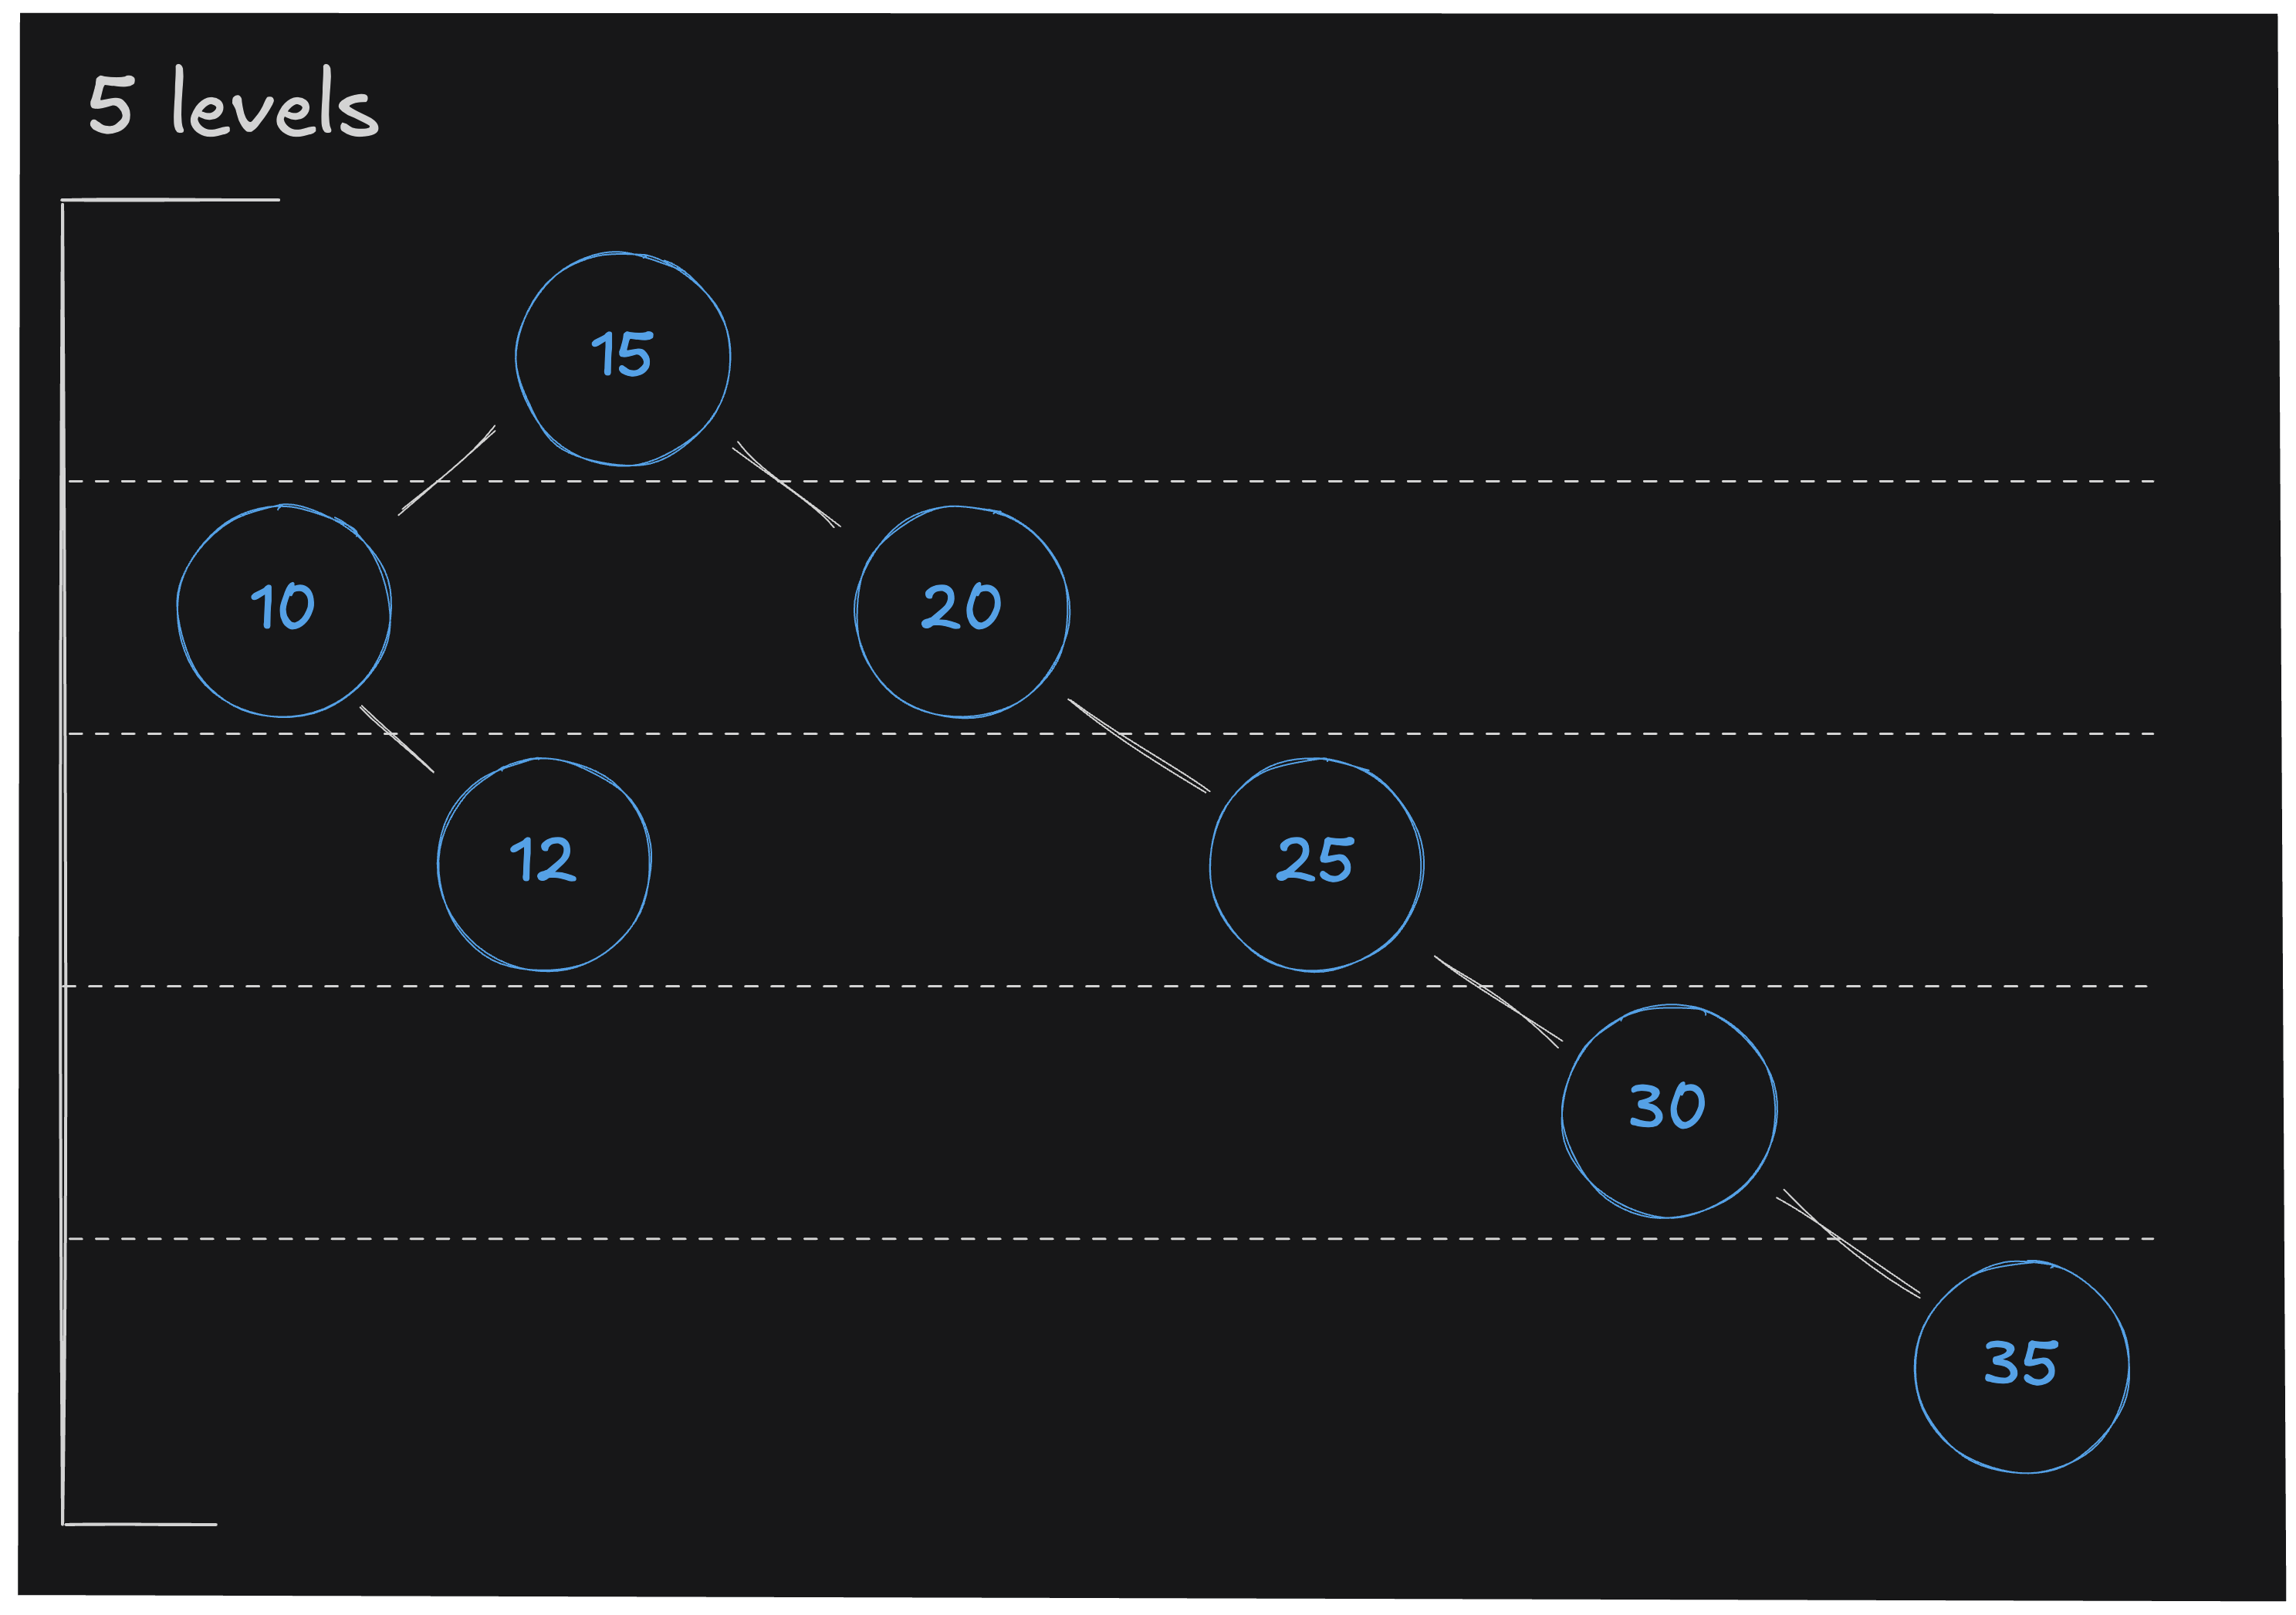

**Balanced tree**
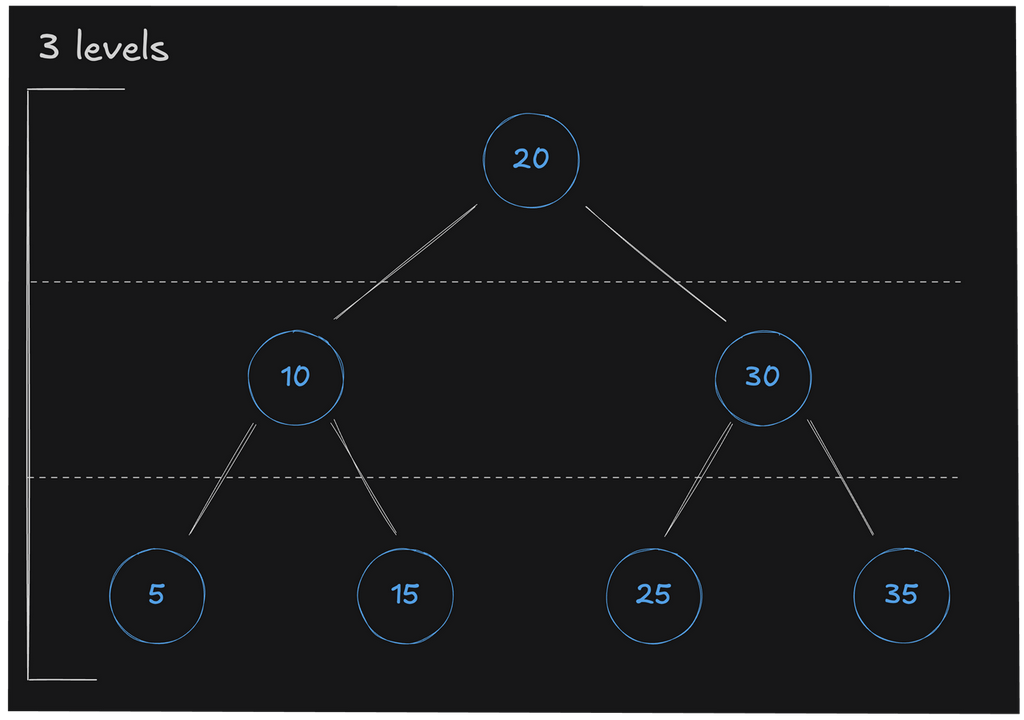

To solve this problem, red-black trees' blocks have an extra bit, called color, to ensure that as nodes are inserted and deleted, the tree remains balanced.  When the tree is modified, the tree is rearranged and repainted to restore some properties that ensure the tree to be balanced. 

The rules are these:

* Each node is either red or black
* The root is black
* All Nil leaf nodes are black
* If a node is red, then both its children are black
* All paths from a single node go through the same number of black nodes to reach any of its descendant Nil (black) nodes to ensure the balance of the tree

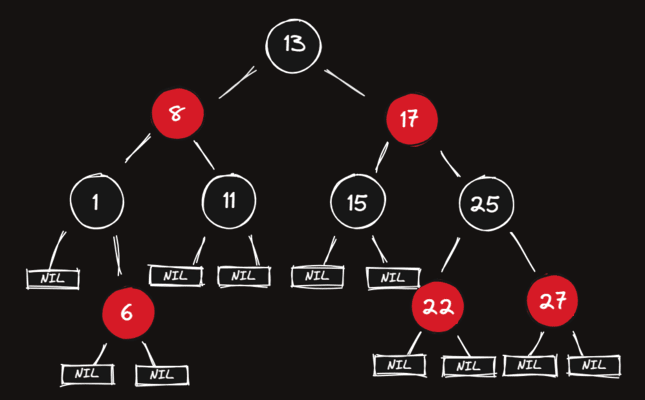

## Simple RBT

The following example implements a RBT. The code is not complete, because this only adds:

* A parent pointer from child parent, and the place of the child respect to its parent
* Mechanism to color nodes (only red for now)


In [1]:
#user class
import random


class User:
    def __init__(self, id):
        self.id = id
        user_names = [
            "Blake",
            "Ricky",
            "Shelley",
            "Dave",
            "George",
            "John",
            "James",
            "Mitch",
            "Williamson",
            "Burry",
            "Vennett",
            "Shipley",
            "Geller",
            "Rickert",
            "Carrell",
            "Baum",
            "Brownfield",
            "Lippmann",
            "Moses",
        ]
        self.user_name = f"{user_names[id % len(user_names)]}#{id}"

    def __eq__(self, other):
        return isinstance(other, User) and self.id == other.id

    def __lt__(self, other):
        return isinstance(other, User) and self.id < other.id

    def __gt__(self, other):
        return isinstance(other, User) and self.id > other.id

    def __repr__(self):
        return "".join(self.user_name)


def get_users(num):
    random.seed(1)
    users = []
    ids = []
    for i in range(num * 3):
        ids.append(i)
    random.shuffle(ids)
    ids = ids[:num]
    for id in ids:
        user = User(id)
        users.append(user)
    return users

In [ ]:
class RBNode:
    def __init__(self, val):
        self.red = False
        self.parent = None
        self.val = val
        self.left = None
        self.right = None


class RBTree:
    def __init__(self):
        self.nil = RBNode(None)
        self.nil.red = False
        self.nil.left = None
        self.nil.right = None
        self.root = self.nil

    def insert(self, val):
        new_node = RBNode(val)
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.red = True

        parent = None
        current_node = self.root

        while current_node is not self.nil:
            #the current_node explores the tree to see the current value, and the node 
            #is stored in the parent var to have a reference when the loop reaches the 
            #bottom of the tree, and the children of the current node are self.nil
            parent = current_node
            if new_node.val < current_node.val:
                current_node = current_node.left
            elif new_node.val > current_node.val:
                current_node = current_node.right
            elif new_node.val == current_node.val:
                return
        #The child identifies the parent
        new_node.parent = parent
        if new_node.parent is None:
            self.root = new_node
        #The son positions himself in relation to his father
        elif new_node.val > new_node.parent.val:
            new_node.parent.right = new_node
        elif new_node.val < new_node.parent.val:
            new_node.parent.left = new_node